<a href="https://colab.research.google.com/github/saquibali7/EyeGazing/blob/main/EyeGaizingScanPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy.random import randint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = '/content/drive/MyDrive/EyeGazing/Images/TCImages'
path2 = '/content/drive/MyDrive/EyeGazing/Images/TSImages'

In [4]:
ASDfiles = os.listdir(path2)
Non_ASDfiles = os.listdir(path1)

In [5]:
print(len(ASDfiles),len(Non_ASDfiles))

219 328


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


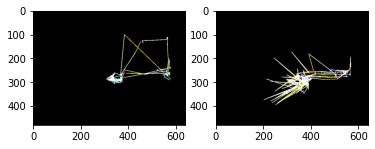

In [6]:
ix1 = randint(0,len(Non_ASDfiles))
ix2 = randint(0,len(ASDfiles))


img1 = os.path.join(path1, Non_ASDfiles[ix1])
img2 = os.path.join(path2, ASDfiles[ix2])

img1 = img_to_array(load_img(img1))
img2 = img_to_array(load_img(img2))

plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)


In [7]:
dir = '/content/drive/MyDrive/EyeGazing/Images'

In [15]:
BATCH_SIZE=32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=90,
    zoom_range=[0.5,1.0],
    validation_split=0.1
)

train_dataset = datagen.flow_from_directory(
    dir,
    target_size=(100,100),
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True)



Found 494 images belonging to 2 classes.


In [16]:
val_dataset = datagen.flow_from_directory(
    dir,
    target_size=(100,100),
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=True)

Found 53 images belonging to 2 classes.


In [10]:
from numpy.random import randint
from keras import initializers
from keras.initializers import RandomNormal
from keras.models import Model, Sequential
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout, Flatten
from keras.layers import BatchNormalization, LayerNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot
from keras.layers import Concatenate
from keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from numpy import reshape
from tensorflow.keras import regularizers
WEIGHT_DECAY = 0.001

In [11]:
model = keras.models.Sequential([
                               keras.layers.Conv2D(64, 7, activation='relu', padding='same',kernel_regularizer=regularizers.l2(WEIGHT_DECAY),input_shape=[100,100,3]),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128, 3, activation='relu', padding='same',kernel_regularizer=regularizers.l2(WEIGHT_DECAY)),
                               keras.layers.Conv2D(128, 3, activation='relu', padding='same',kernel_regularizer=regularizers.l2(WEIGHT_DECAY)),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(WEIGHT_DECAY)),
                               keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(WEIGHT_DECAY)),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(128, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(64, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(3, activation='softmax')


])

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [19]:
history = model.fit_generator(
                    train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=50,
                    validation_data = val_dataset,
                    validation_steps = len(val_dataset),
                    callbacks=callback)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50


InvalidArgumentError: ignored